In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

    

1 Physical GPUs, 1 Logical GPUs


In [2]:
import Bibli_DataScience_3 as ds
import RNN_DataScience as rnn

C:\Users\Shadow\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import imp
imp.reload(ds)
imp.reload(rnn)

C:\Users\Shadow\AppData\Local\Temp\ipykernel_4712\1349856159.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'RNN_DataScience' from 'C:\\Users\\Shadow\\anaconda3\\envs\\tf\\PROJET\\RNN_DataScience.py'>

# EMBEDDING

In [4]:
emb = rnn.RNN_EMBEDDING2("Mon_Modele_RNN")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:

train_acc,val_acc,tloss,tvalloss = emb.fit_modele(10,True)

save y_train_avant.shape  (67932,)
self.EMBEDDING_DIM 300
suite
(67932, 27)
(16984, 27)
input :  0
Epoch 1/10
2123/2123 [==============================] - 35s 15ms/step - loss: 2.1607 - accuracy: 0.3590 - val_loss: 1.6084 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 2/10
2123/2123 [==============================] - 32s 15ms/step - loss: 1.3826 - accuracy: 0.5676 - val_loss: 1.3142 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 3/10
2123/2123 [==============================] - 32s 15ms/step - loss: 0.9666 - accuracy: 0.7017 - val_loss: 1.1403 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 4/10
2123/2123 [==============================] - 32s 15ms/step - loss: 0.6877 - accuracy: 0.7949 - val_loss: 1.1152 - val_accuracy: 0.6978 - lr: 0.0010
Epoch 5/10
2123/2123 [==============================] - 32s 15ms/step - loss: 0.5016 - accuracy: 0.8535 - val_loss: 1.1350 - val_accuracy: 0.7106 - lr: 0.0010
Epoch 6/10
2123/2123 [==============================] - 31s 15ms/step - loss: 0.3781 - accuracy: 0.8918 - 

In [5]:
"""
# RECUPERATION

train_acc,val_acc,tloss,tvalloss = rnn.restore_fit_arrays()
y_orig,y_pred = rnn.restore_predict_arrays()
df_pred = rnnt.restore_predict_dataframe()
"""



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Shadow\\anaconda3\\envs\\tf\\PROJET\\fichiers\\Mon_Modele_RNN_accuracy.pkl'

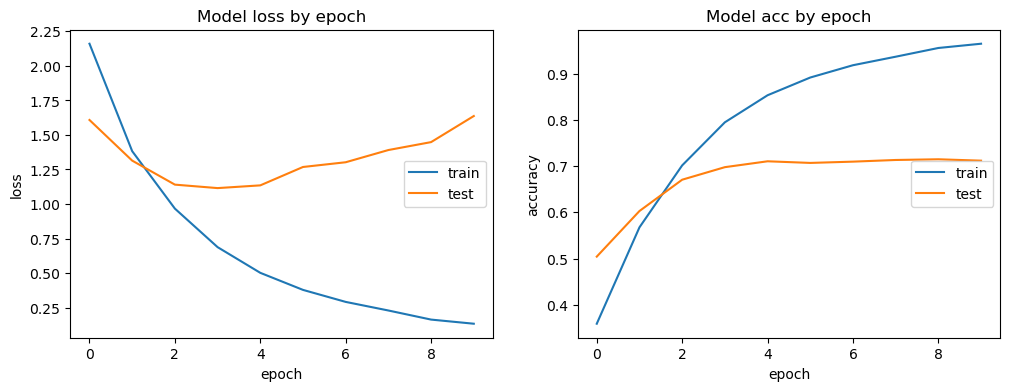

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [7]:
df_pred = emb.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.304976,2705,0.258427,2280,0.089888
1,40,40,0.541833,50,0.077689,2403,0.053785
2,50,50,0.648810,40,0.089286,2462,0.062500
3,60,60,0.734940,2462,0.156627,50,0.090361
4,1140,1140,0.597378,1280,0.080524,40,0.078652
5,1160,1160,0.816688,2705,0.042984,40,0.041719
6,1180,1180,0.405229,1140,0.091503,1281,0.091503
7,1280,1280,0.567762,1281,0.136550,1140,0.059548
8,1281,1281,0.413043,1280,0.128019,10,0.062802
9,1300,1300,0.904856,1280,0.039643,2060,0.012884


In [8]:
y_orig = emb.get_y_orig()
y_pred = emb.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 71.1905322656618 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.36      0.30      0.33       623
          40       0.47      0.54      0.50       502
          50       0.65      0.65      0.65       336
          60       0.90      0.73      0.81       166
        1140       0.61      0.60      0.61       534
        1160       0.85      0.82      0.83       791
        1180       0.34      0.41      0.37       153
        1280       0.61      0.57      0.59       974
        1281       0.30      0.41      0.35       414
        1300       0.95      0.90      0.92      1009
        1301       0.87      0.82      0.85       161
        1302       0.67      0.70      0.68       498
        1320       0.64      0.62      0.63       648
        1560       0.77      0.76      0.77      1015
        1920       0.86      0.86      0.86       861
        1940       0.69      0.62

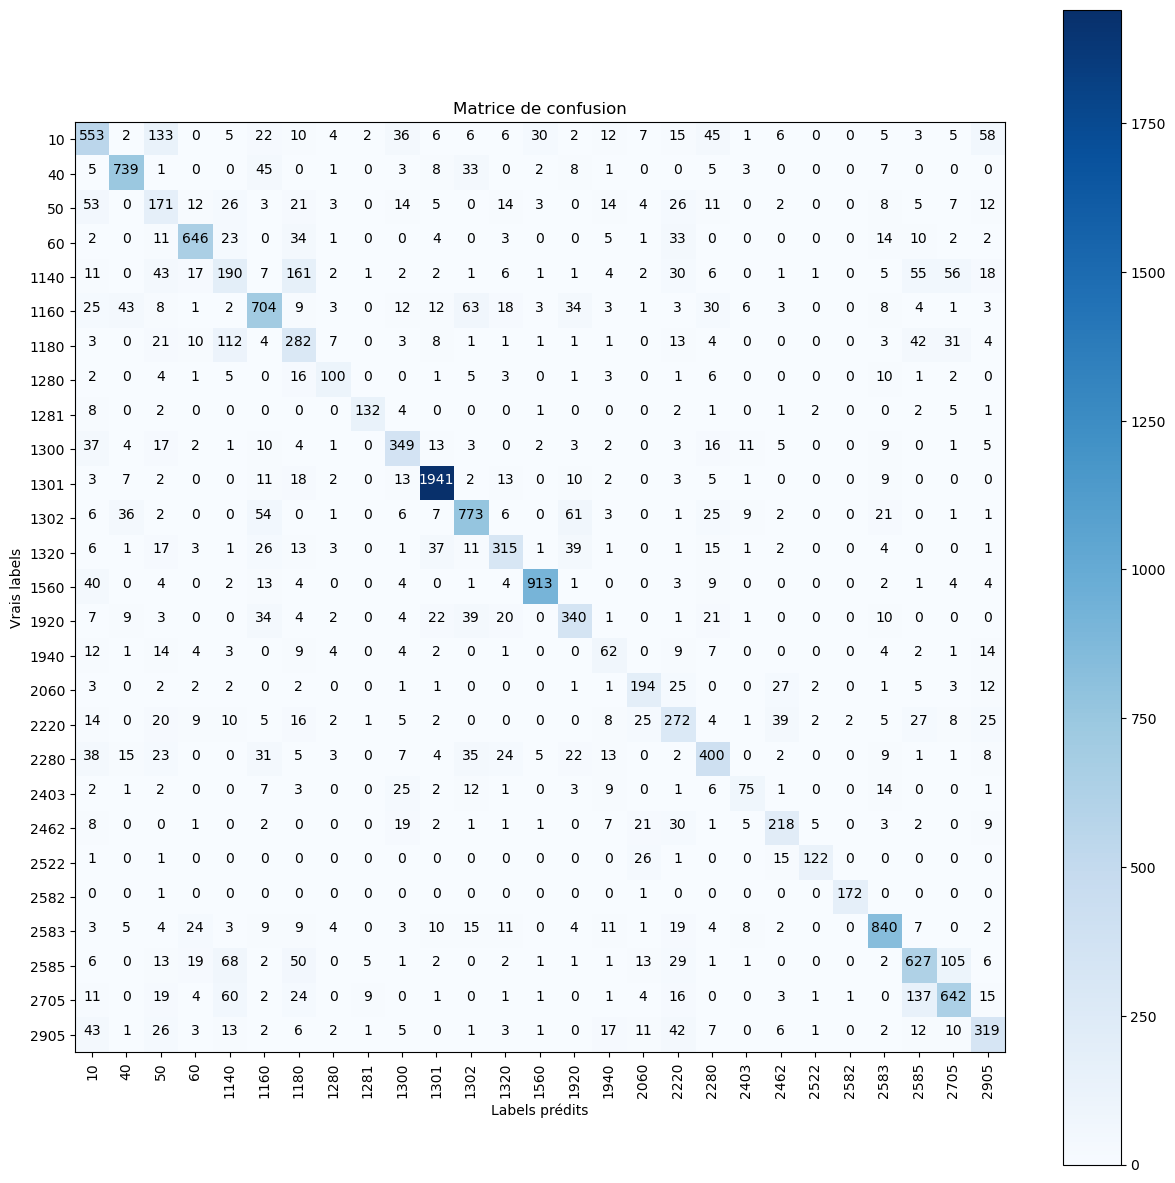

In [9]:
ds.show_confusion_matrix(y_orig, y_pred)

In [66]:
ds.ajout_REPORT_40_VALACC(val_acc,emb.get_MODELE(),emb.get_LIBBELLE(),emb.get_ID())
ds.ajout_REPORT_40_ACC(train_acc,emb.get_MODELE(),emb.get_LIBBELLE(),emb.get_ID())
ds.ajout_REPORT_40_PRED(y_orig, y_pred,emb.get_MODELE(),emb.get_LIBBELLE(),emb.get_ID())
print(emb.get_ID())
print(emb.get_LIBBELLE())

EMBED1
EMBEDDING


# EMBEDDING + STEMMER

In [2]:
import Bibli_DataScience_3 as ds
import RNN_DataScience as rnn

In [50]:
import imp
imp.reload(ds)
imp.reload(rnn)

<module 'RNN_DataScience' from 'C:\\Users\\Shadow\\anaconda3\\envs\\tf\\PROJET\\RNN_DataScience.py'>

In [3]:
stem = rnn.RNN_STEMMER2("EMBEDDING STEMMER")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:

train_acc,val_acc,tloss,tvalloss = stem.fit_modele(10,True)

save y_train_avant.shape  (67932,)
self.EMBEDDING_DIM 300
suite
(67932, 27)
(16984, 27)
input :  0
Epoch 1/10
2123/2123 [==============================] - 35s 15ms/step - loss: 2.1730 - accuracy: 0.3428 - val_loss: 1.5131 - val_accuracy: 0.5389 - lr: 0.0010
Epoch 2/10
2123/2123 [==============================] - 31s 15ms/step - loss: 1.2244 - accuracy: 0.6209 - val_loss: 1.1554 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 3/10
2123/2123 [==============================] - 31s 15ms/step - loss: 0.8558 - accuracy: 0.7407 - val_loss: 1.0673 - val_accuracy: 0.6962 - lr: 0.0010
Epoch 4/10
2123/2123 [==============================] - 31s 15ms/step - loss: 0.6281 - accuracy: 0.8153 - val_loss: 1.0837 - val_accuracy: 0.7065 - lr: 0.0010
Epoch 5/10
2123/2123 [==============================] - 31s 15ms/step - loss: 0.4806 - accuracy: 0.8617 - val_loss: 1.1123 - val_accuracy: 0.7107 - lr: 0.0010
Epoch 6/10
2123/2123 [==============================] - 31s 15ms/step - loss: 0.3803 - accuracy: 0.8921 - 

In [138]:
# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = inc.restore_fit_arrays()
y_orig,y_pred = inc.restore_predict_arrays()
df_pred = inc.restore_predict_dataframe()

"""




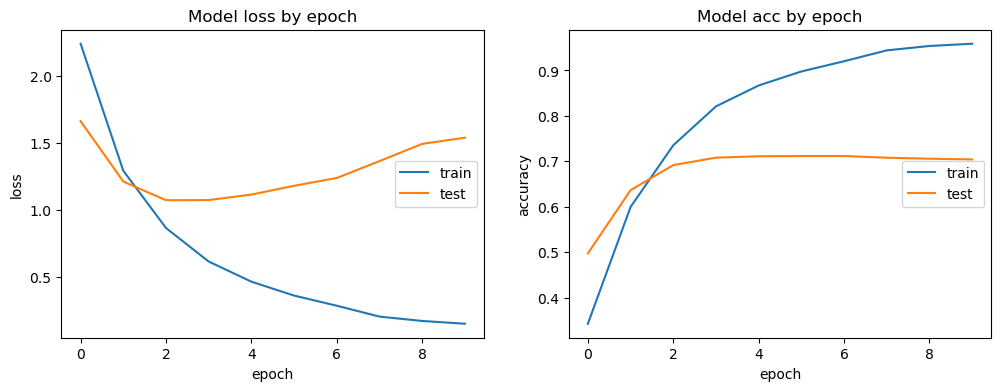

In [12]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [13]:
df_pred = stem.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.364366,2705,0.207063,2403,0.118780
1,40,40,0.557769,50,0.073705,1281,0.069721
2,50,50,0.660714,40,0.089286,2462,0.074405
3,60,60,0.789157,2462,0.096386,50,0.060241
4,1140,1140,0.567416,1280,0.080524,1281,0.076779
5,1160,1160,0.804046,1281,0.036662,10,0.034134
6,1180,1180,0.333333,1140,0.111111,1281,0.098039
7,1280,1280,0.562628,1281,0.119097,1140,0.060575
8,1281,1281,0.338164,1280,0.166667,40,0.079710
9,1300,1300,0.876115,1280,0.046581,2522,0.017839


In [14]:

y_orig = stem.get_y_orig()
y_pred = stem.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 70.40744229863401 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.35      0.36      0.36       623
          40       0.55      0.56      0.55       502
          50       0.64      0.66      0.65       336
          60       0.79      0.79      0.79       166
        1140       0.57      0.57      0.57       534
        1160       0.88      0.80      0.84       791
        1180       0.32      0.33      0.33       153
        1280       0.60      0.56      0.58       974
        1281       0.29      0.34      0.31       414
        1300       0.94      0.88      0.91      1009
        1301       0.77      0.85      0.81       161
        1302       0.69      0.75      0.72       498
        1320       0.66      0.60      0.63       648
        1560       0.72      0.77      0.75      1015
        1920       0.85      0.86      0.85       861
        1940       0.73      0.5

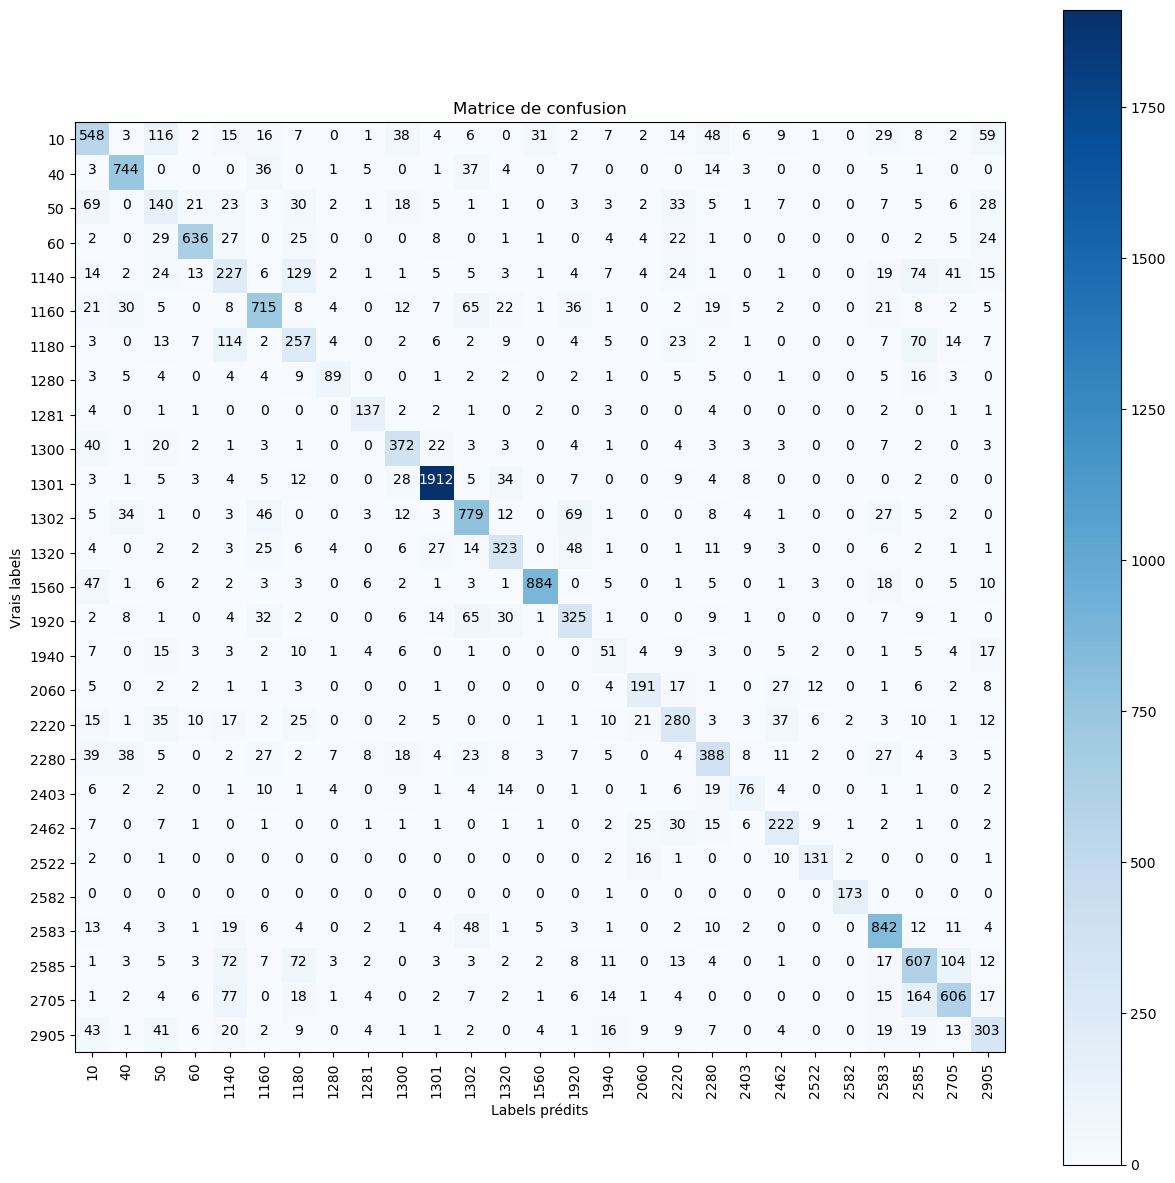

In [15]:
ds.show_confusion_matrix(y_orig, y_pred)

In [105]:
ds.ajout_REPORT_40_VALACC(val_acc,stem.get_MODELE(),stem.get_LIBBELLE(),stem.get_CNN())
ds.ajout_REPORT_40_ACC(train_acc,stem.get_MODELE(),stem.get_LIBBELLE(),stem.get_CNN())
ds.ajout_REPORT_40_PRED(y_orig, y_pred,stem.get_MODELE(),stem.get_LIBBELLE(),stem.get_CNN())
print(test.get_CNN())
print(test.get_LIBBELLE())

   Unnamed: 0.1  Unnamed: 0  Epoch  val_accuracy                modele  \
0           NaN         NaN      1      0.155422  Mon_Modele_Inception   
1           NaN         NaN      2      0.158625  Mon_Modele_Inception   
2           NaN         NaN      3      0.164154  Mon_Modele_Inception   
3           NaN         NaN      4      0.169494  Mon_Modele_Inception   
4           NaN         NaN      5      0.174896  Mon_Modele_Inception   

                                             libelle     id  
0  INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC10...  CNN30  
1  INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC10...  CNN30  
2  INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC10...  CNN30  
3  INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC10...  CNN30  
4  INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC10...  CNN30  
CNN30
INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC1024-NORM-CC1024-DR40


# EMBEDDING + GRU

In [2]:
import Bibli_DataScience_3 as ds
import RNN_DataScience as rnn

E:\Users\shaky\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import imp
imp.reload(ds)
imp.reload(rnn)

<module 'RNN_DataScience' from 'E:\\Manuel\\PROJET\\RNN_DataScience.py'>

In [3]:
gru = rnn.RNN_GRU("EMBEDDING GRU")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
train_acc,val_acc,tloss,tvalloss = gru.fit_modele(3,True)

(67932, 27)
(16984, 27)
Epoch 1/3
2123/2123 [==============================] - 6739s 3s/step - loss: 1.7079 - accuracy: 0.5002 - val_loss: 0.9498 - val_accuracy: 0.7157 - lr: 0.0010
Epoch 2/3
2123/2123 [==============================] - 6704s 3s/step - loss: 0.7300 - accuracy: 0.7804 - val_loss: 0.7902 - val_accuracy: 0.7754 - lr: 0.0010
Epoch 3/3
531/531 [==============================] - 140s 263ms/step
E:\\Manuel\\PROJET\\EMBEDDING GRU_weight.h5


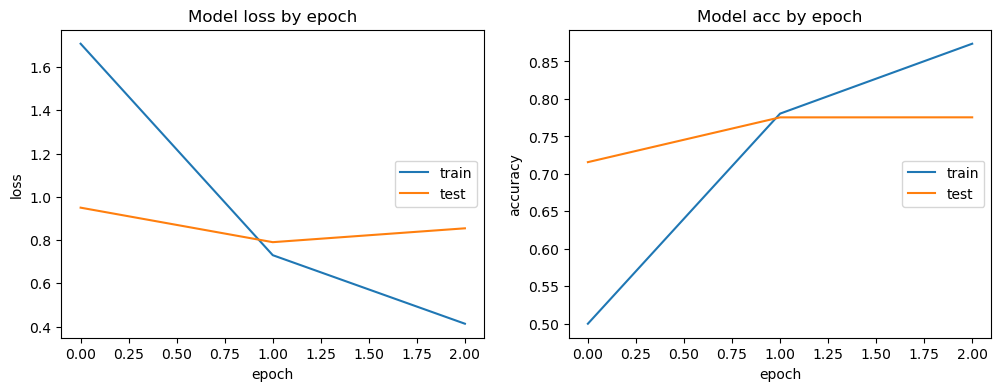

In [5]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

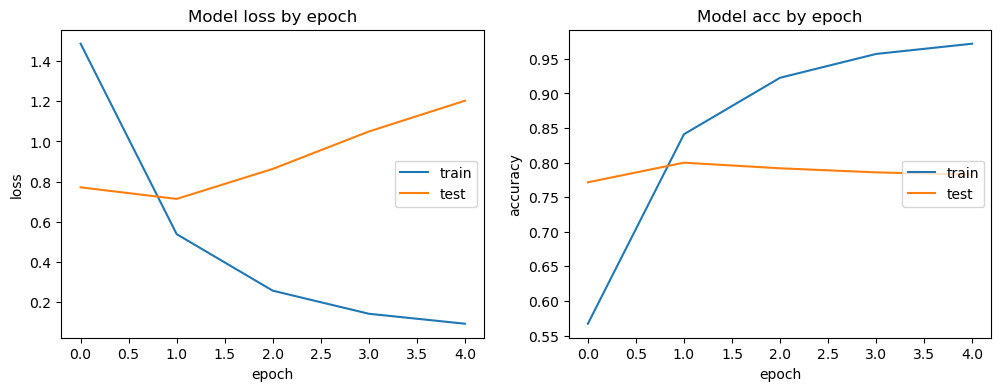

In [22]:
#ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [7]:
df_cross = gru.get_df_cross()
df_pred = gru.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.372392,2705,0.266453,2280,0.089888
1,40,40,0.643426,1281,0.073705,50,0.045817
2,50,50,0.776786,60,0.053571,40,0.044643
3,60,60,0.837349,50,0.066265,2462,0.066265
4,1140,1140,0.704120,1280,0.067416,40,0.037453
5,1160,1160,0.854614,1140,0.027813,2705,0.026549
6,1180,1180,0.470588,1140,0.150327,1281,0.130719
7,1280,1280,0.621150,1281,0.126283,1140,0.067762
8,1281,1281,0.504831,1280,0.144928,40,0.062802
9,1300,1300,0.929633,1280,0.023786,2280,0.012884


In [8]:

y_orig = gru.get_y_orig()
y_pred = gru.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 77.54357041921809 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.45      0.37      0.41       623
          40       0.55      0.64      0.59       502
          50       0.74      0.78      0.76       336
          60       0.79      0.84      0.81       166
        1140       0.66      0.70      0.68       534
        1160       0.91      0.85      0.88       791
        1180       0.52      0.47      0.49       153
        1280       0.69      0.62      0.66       974
        1281       0.38      0.50      0.44       414
        1300       0.95      0.93      0.94      1009
        1301       0.96      0.84      0.90       161
        1302       0.78      0.79      0.79       498
        1320       0.74      0.78      0.76       648
        1560       0.76      0.83      0.79      1015
        1920       0.89      0.89      0.89       861
        1940       0.73      0.7

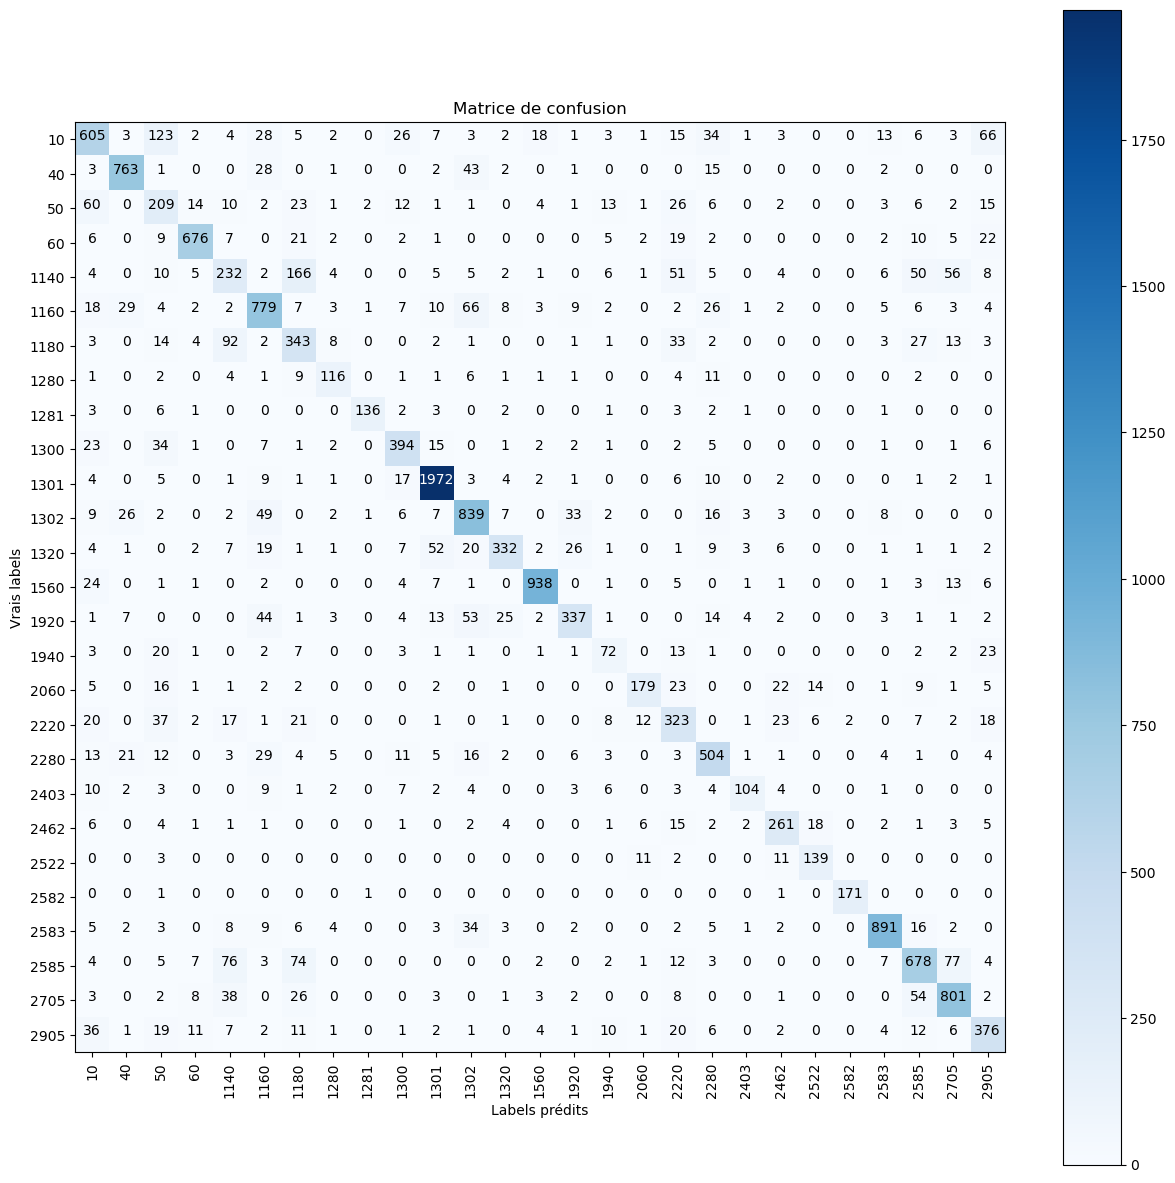

In [9]:
ds.show_confusion_matrix(y_orig, y_pred)

In [10]:
Lcat=gru.get_cat()
catdict = gru.get_catdict()
ds.Afficher_repartition(df_cross,Lcat,catdict)

10    ------    livres
  : 10,  : 37.24 % , livres
  : 2705,  : 26.65 % , bds et livres
  : 2280,  : 8.99 % , magazines
  : 40,  : 8.19 % , jeux video pour pc et consoles
  : 2403,  : 8.03 % , livres et bds
40    ------    jeux video pour pc et consoles
  : 40,  : 64.34 % , jeux video pour pc et consoles
  : 1281,  : 7.37 % , jeux de societe/cartes
  : 50,  : 4.58 % ,  accesoires jeux video
  : 2705,  : 4.18 % , bds et livres
  : 1280,  : 3.98 % , jouets, peluches, puppets
50    ------     accesoires jeux video
  : 50,  : 77.68 % ,  accesoires jeux video
  : 60,  : 5.36 % , consoles de jeux video
  : 40,  : 4.46 % , jeux video pour pc et consoles
  : 1280,  : 1.79 % , jouets, peluches, puppets
  : 2462,  : 1.79 % , consoles de jeux video et jeux videos
60    ------    consoles de jeux video
  : 60,  : 83.73 % , consoles de jeux video
  : 50,  : 6.63 % ,  accesoires jeux video
  : 2462,  : 6.63 % , consoles de jeux video et jeux videos
  : 1281,  : 1.81 % , jeux de societe/cartes
  : 40

# EMBEDDING + SPACY

In [3]:
import Bibli_DataScience_3 as ds
import RNN_DataScience as rnn
import imp
imp.reload(ds)
imp.reload(rnn)

C:\Users\Shadow\AppData\Local\Temp\ipykernel_8420\4122339906.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'RNN_DataScience' from 'C:\\Users\\Shadow\\anaconda3\\envs\\tf\\PROJET\\RNN_DataScience.py'>

In [4]:
spacy = rnn.RNN_SPACY("EMBEDDING SPACY")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
train_acc,val_acc,tloss,tvalloss = spacy.fit_modele(80,True,spacy=True)

save y_train_avant.shape  (67932,)
self.EMBEDDING_DIM 300
creation dictionnaire
longueur dictionnaire 61612
creation matrice
embedding_matrix.shape =  (61613, 300)
suite
(67932, 27)
(16984, 27)
input :  61612
output :  300
len_embedding_dict =  61613
Epoch 1/80
2123/2123 [==============================] - 50s 23ms/step - loss: 2.7103 - accuracy: 0.2442 - val_loss: 2.3243 - val_accuracy: 0.3502 - lr: 0.0010
Epoch 2/80
2123/2123 [==============================] - 49s 23ms/step - loss: 2.2830 - accuracy: 0.3692 - val_loss: 2.0029 - val_accuracy: 0.4506 - lr: 0.0010
Epoch 3/80
2123/2123 [==============================] - 50s 23ms/step - loss: 2.0177 - accuracy: 0.4348 - val_loss: 1.8068 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 4/80
2123/2123 [==============================] - 50s 23ms/step - loss: 1.8840 - accuracy: 0.4722 - val_loss: 1.7163 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 5/80
2123/2123 [==============================] - 49s 23ms/step - loss: 1.7629 - accuracy: 0.5023 - val_los

In [15]:
# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = spacy.restore_fit_arrays()
y_orig,y_pred = spacy.restore_predict_arrays()
df_pred = spacy.restore_predict_dataframe()

"""



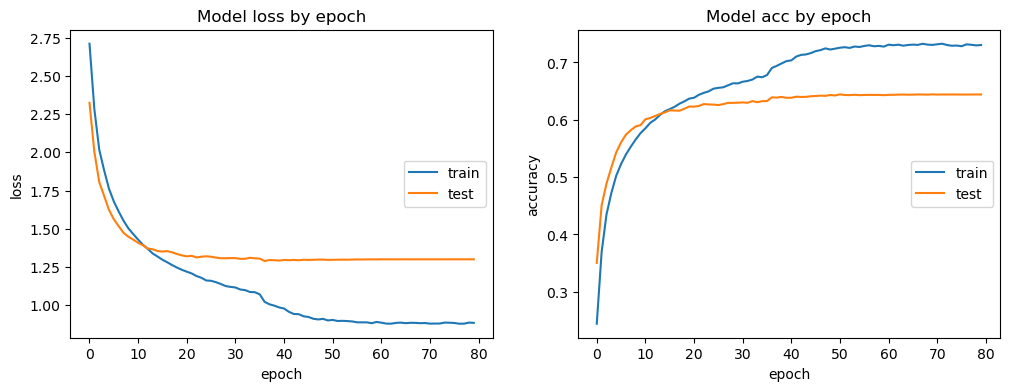

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [12]:
df_pred = spacy.get_df_pred()
df_pred

,Unnamed: 0,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,0,10,2705,0.402889,10,0.147673,2280,0.131621
1,1,40,40,0.490040,2705,0.157371,50,0.065737
2,2,50,50,0.526786,2462,0.065476,40,0.050595
3,3,60,60,0.728916,50,0.096386,2462,0.066265
4,4,1140,1140,0.576779,2705,0.076779,1280,0.074906
5,5,1160,1160,0.672566,2705,0.131479,2583,0.041719
6,6,1180,1180,0.320261,2705,0.156863,1140,0.156863
7,7,1280,1280,0.597536,1140,0.055441,2705,0.046201
8,8,1281,1281,0.314010,1280,0.178744,2705,0.154589
9,9,1300,1300,0.838454,2705,0.034688,1280,0.026759


In [16]:
y_orig = spacy.get_y_orig()
y_pred = spacy.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 64.40178991992464 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.19      0.15      0.16       623
          40       0.55      0.49      0.52       502
          50       0.60      0.53      0.56       336
          60       0.83      0.73      0.78       166
        1140       0.60      0.58      0.59       534
        1160       0.70      0.67      0.69       791
        1180       0.72      0.32      0.44       153
        1280       0.58      0.60      0.59       974
        1281       0.54      0.31      0.40       414
        1300       0.92      0.84      0.88      1009
        1301       0.94      0.71      0.81       161
        1302       0.66      0.53      0.59       498
        1320       0.59      0.52      0.55       648
        1560       0.69      0.70      0.69      1015
        1920       0.82      0.82      0.82       861
        1940       0.62      0.2

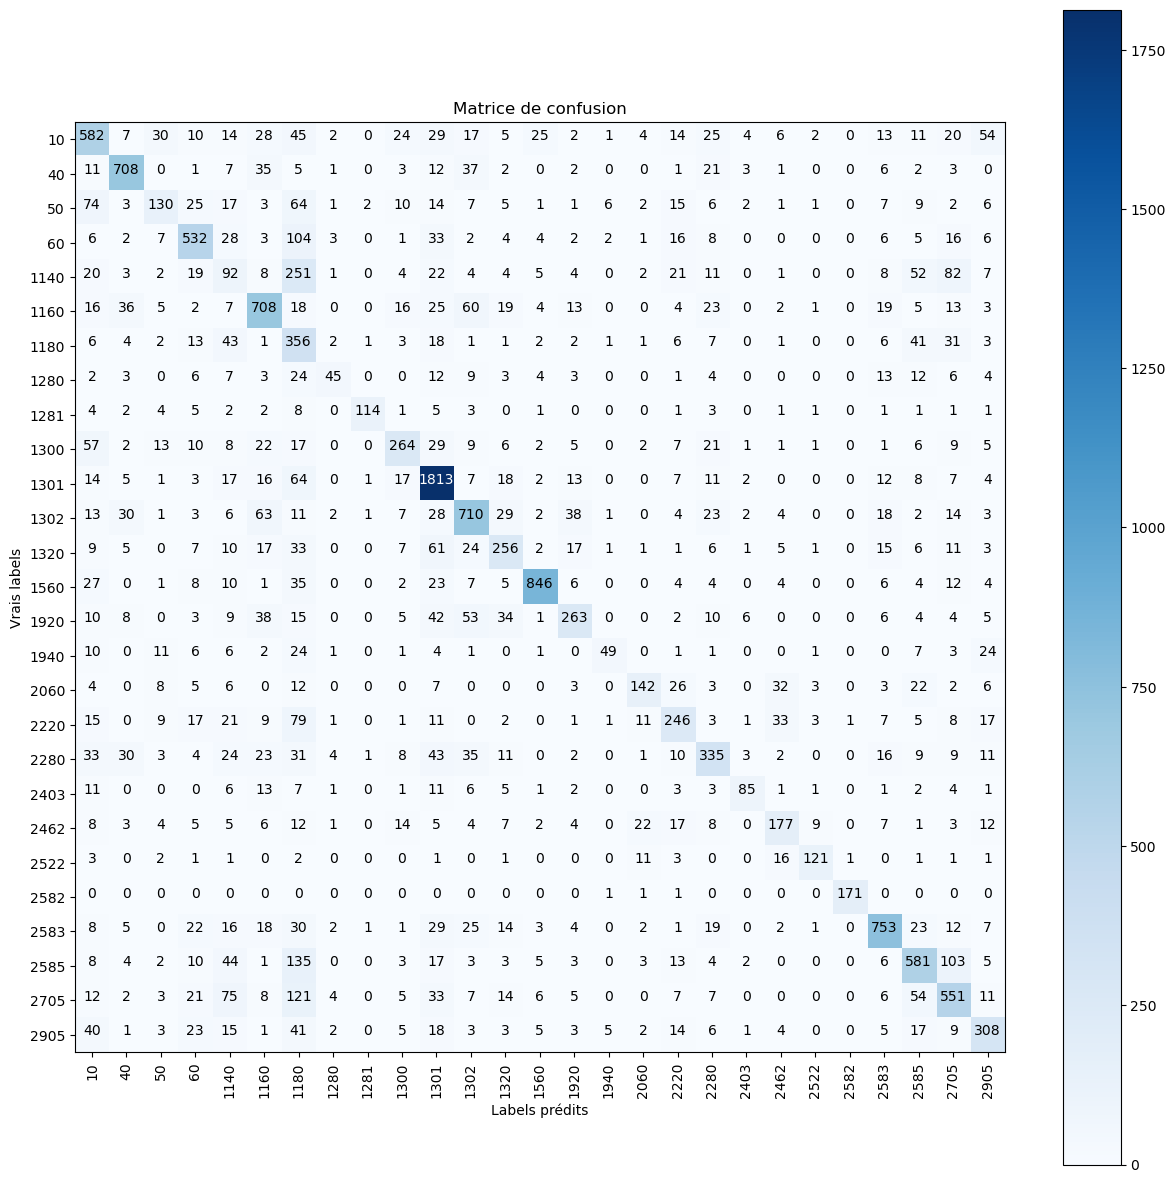

In [17]:
ds.show_confusion_matrix(y_orig, y_pred)

# CAMENBERT

In [47]:
import Bibli_DataScience_2 as ds
import RNN_DataScience as rnn
import imp
imp.reload(ds)
imp.reload(rnn)

<module 'RNN_DataScience' from 'C:\\Users\\Shadow\\anaconda3\\envs\\tf\\PROJET\\RNN_DataScience.py'>

In [48]:
camenbert = rnn.RNN_CAMENBERT("CAMEMBERT")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

Some layers of TFCamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
train_acc,val_acc,tloss,tvalloss = camenbert.fit_modele(2,True,spacy=False)

(67932, 27)
(16984, 27)
0                                  serpent anacond 137
1    2pc reutilis chinois magiqu tissu papi eau cal...
2                          bross boisseau fil aci inox
3                 ecrou nylstop pour debroussaill ryob
4     peugeot 307 epur voitur miniatur dej monte norev
Name: designation, dtype: object
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Shadow\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Shadow\AppData\Local\Temp\ipykernel_11296\1843762325.py", line 1, in <module>
    train_acc,val_acc,tloss,tvalloss = camenbert.fit_modele(2,True,spacy=False)
  File "C:\Users\Shadow\anaconda3\envs\tf\PROJET\RNN_DataScience.py", line 511, in fit_modele
    training_history = model.fit(train_encodings, y_train,batch_size = 32, epochs=epochs, validation_data = [test_encodings, y_test],callbacks=[lr_plateau])
  File "C:\Users\Shadow\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\Shadow\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 1083, in select_data_adapter
    raise ValueError(
ValueError: Failed to find data adapter that can ha